# EDA_AUTOMATION_USING_LLM_FRAMEWORK USING PANDAS,MATPLOTLIB,SEABORN,GRADIO

In [1]:
import  pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

url =(r"C:\Users\Supravata\Desktop\datascience\pdfs\excels\titanic_ dataset_final.csv")

In [2]:
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print('\n missing values : \n',df.isnull().sum())


 missing values : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


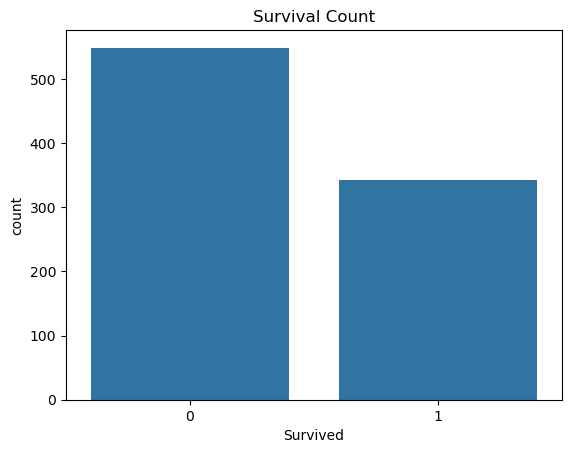

In [5]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

In [6]:
import sys
!{sys.executable} -m pip install gradio

In [7]:
!pip install ollama

In [8]:
import ollama

def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\n🔹 AI-Generated Insights:\n", insights)


🔹 AI-Generated Insights:
  The dataset you've provided appears to be a summary statistics for the Titanic passenger data. Here are some key insights:

1. **Total Records**: There are 891 unique records in the dataset, which represents passengers on the Titanic.

2. **Survived**: The mean (average) number of passengers who survived is approximately 0.384 out of 1, suggesting that a significant majority did not survive. The minimum value is 0 and maximum is 1, indicating whether each passenger survived or not.

3. **Pclass**: This variable represents the class of travel on the Titanic, with a mean of about 2.31 (first-class passengers are 1, second-class are 2, and third-class are 3). The standard deviation is relatively low, indicating that most passengers were in either first or second class.

4. **Age**: The mean age of the passengers is about 29.7 years old, with a standard deviation of approximately 14.53 years. This suggests a wide range of ages among the passengers. The minimum a

In [8]:
import gradio as gr


def greet(name):
    return "Hello " + name + "!"


demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [9]:
import gradio as gr

# Function for data analysis


def data_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    return summary


# Create Web Interface
demo = gr.Interface(
    fn=data_analysis,
    inputs="file",
    outputs="text",
    title="AI-powered Data Analysis"
)

# Launch App
demo.launch(share=True)  # use share=True if you want a public link

* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
